# Analysis of Billionaires around the globe using Python 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("Billionairelist.csv")
df.head()
#Reading the dataset 

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [3]:
df.info()
#information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [4]:
df.describe()
#describing the numerical data

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


Making some changes in the dataset so the dataset is ready for analysis

In [5]:
df.isnull().sum()
#checking for null values in the dataset

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [6]:
df=df.dropna()
#Droping the rows having null values
#By default axis=0

In [7]:
df.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [8]:
df.duplicated().value_counts()
#No duplicates in the dataset

False    2676
dtype: int64

In [9]:
df.NetWorth=df.NetWorth.str.replace('$','')
df.NetWorth=df.NetWorth.str.replace('B','')
df.NetWorth=df.NetWorth.astype("float")
#Here the NetWorth column was not in float, Since we will be performing arithmetic operations for 
#analysis we need the values to be in appropriate format

In [10]:
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


Now there are no null values in the dataset
The Net Worth Attribute is modified and converted to float for further statistic operations
Note that all the values in NetWorth are in Billion

# Analysis 1

In [11]:
df.nunique()

Name        2673
NetWorth     245
Country       70
Source       909
Rank         245
Age           76
Industry      18
dtype: int64

In [12]:
df.describe(include=["object"])

,Name,Country,Source,Industry
count,2676,2676,2676,2676
unique,2673,70,909,18
top,Li Li,United States,real estate,Finance & Investments
freq,2,720,169,365


In [13]:
df.head(10)
#Top 10 billionaires in the world

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


In [14]:
df[df.Age==df.Age.min()]
#Youngest Billionaire in the world

,Name,NetWorth,Country,Source,Rank,Age,Industry
940,Kevin David Lehmann,3.3,Germany,drugstores,925,18.0,Fashion & Retail


In [15]:
df[df.Age==df.Age.max()]
#Oldest Billionaire in the world

,Name,NetWorth,Country,Source,Rank,Age,Industry
1611,George Joseph,2.0,United States,insurance,1580,99.0,Finance & Investments


In [16]:
df.Country.value_counts().head()
#Top 5 Countries  in Number of Billionaires

United States    720
China            610
India            134
Russia           118
Germany          115
Name: Country, dtype: int64

In [17]:
df.groupby("Country").Age.mean().round()
#Average Age of the Billionaires Country wise

Country
Algeria           77.0
Argentina         86.0
Australia         65.0
Austria           70.0
Belgium           61.0
                  ... 
United Kingdom    67.0
United States     66.0
Venezuela         61.0
Vietnam           55.0
Zimbabwe          60.0
Name: Age, Length: 70, dtype: float64

In [18]:
df.Industry.value_counts()
#Count of Billionaires in the following Industries

Finance & Investments         365
Technology                    355
Manufacturing                 317
Fashion & Retail              268
Healthcare                    213
Real Estate                   211
Food & Beverage               204
Diversified                   180
Energy                         99
Media & Entertainment          92
Metals & Mining                73
Service                        73
Automotive                     67
Construction & Engineering     43
Logistics                      35
Telecom                        32
Gambling & Casinos             25
Sports                         24
Name: Industry, dtype: int64

In [19]:
df.groupby("Industry").NetWorth.mean()
#Mean Net Worth in the following Industries

Industry
Automotive                    6.944776
Construction & Engineering    2.802326
Diversified                   4.622222
Energy                        4.555556
Fashion & Retail              6.291045
Finance & Investments         4.141370
Food & Beverage               4.782843
Gambling & Casinos            5.360000
Healthcare                    3.652582
Logistics                     4.165714
Manufacturing                 3.394953
Media & Entertainment         5.145652
Metals & Mining               5.858904
Real Estate                   3.769194
Service                       3.289041
Sports                        3.404167
Technology                    6.850141
Telecom                       6.543750
Name: NetWorth, dtype: float64

In [20]:
df.groupby("Industry").Age.mean().round()
#Mean Age in the following Industries

Industry
Automotive                    61.0
Construction & Engineering    65.0
Diversified                   67.0
Energy                        65.0
Fashion & Retail              66.0
Finance & Investments         65.0
Food & Beverage               65.0
Gambling & Casinos            67.0
Healthcare                    63.0
Logistics                     66.0
Manufacturing                 62.0
Media & Entertainment         62.0
Metals & Mining               59.0
Real Estate                   66.0
Service                       63.0
Sports                        71.0
Technology                    55.0
Telecom                       65.0
Name: Age, dtype: float64

In [21]:
df.groupby("Country").Age.mean()
#Mean Age in the Country wise

Country
Algeria           77.000000
Argentina         85.750000
Australia         65.302326
Austria           69.583333
Belgium           60.666667
                    ...    
United Kingdom    66.722222
United States     66.009722
Venezuela         61.000000
Vietnam           55.000000
Zimbabwe          60.000000
Name: Age, Length: 70, dtype: float64

<AxesSubplot:xlabel='Industry'>

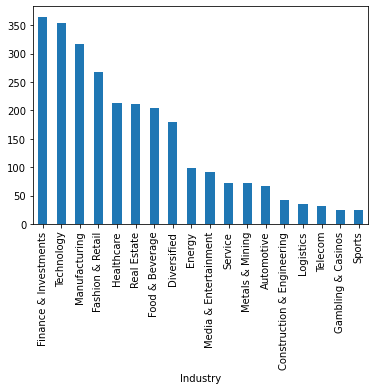

In [22]:
df.value_counts("Industry").plot(kind="bar")

# Analysis of Indian Billionaires

In [23]:
df_India=df[df.Country=="India"]
#Creating New Data Set for Indian Billionaires

In [24]:
df_India.count()

Name        134
NetWorth    134
Country     134
Source      134
Rank        134
Age         134
Industry    134
dtype: int64

In [25]:
df_India.head(10)
#Top 10 billionaires in India
#Mukesh Ambani Tops the list with Net Worth of 84.5 Billion

,Name,NetWorth,Country,Source,Rank,Age,Industry
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified
23,Gautam Adani & family,50.5,India,"infrastructure, commodities",24,58.0,Diversified
71,Shiv Nadar,23.5,India,software services,71,75.0,Technology
116,Radhakishan Damani,16.5,India,"retail, investments",117,66.0,Fashion & Retail
122,Uday Kotak,15.9,India,banking,121,62.0,Finance & Investments
133,Lakshmi Mittal,14.9,India,steel,133,70.0,Metals & Mining
167,Kumar Birla,12.8,India,commodities,168,53.0,Diversified
169,Cyrus Poonawalla,12.7,India,vaccines,169,79.0,Healthcare
203,Dilip Shanghvi,10.9,India,pharmaceuticals,203,65.0,Healthcare
213,Sunil Mittal & family,10.5,India,telecom,213,63.0,Telecom


In [26]:
df_India.sort_values("Age").tail(1)
#Oldest Indian Billionaire

,Name,NetWorth,Country,Source,Rank,Age,Industry
1872,Devendra Jain,1.7,India,chemicals,1833,92.0,Manufacturing


In [27]:
df_India.sort_values("Age").head(1)
#Youngest Indian Billionaire

,Name,NetWorth,Country,Source,Rank,Age,Industry
2528,Binny Bansal,1.1,India,flipkart,2524,38.0,Technology


<AxesSubplot:xlabel='Industry'>

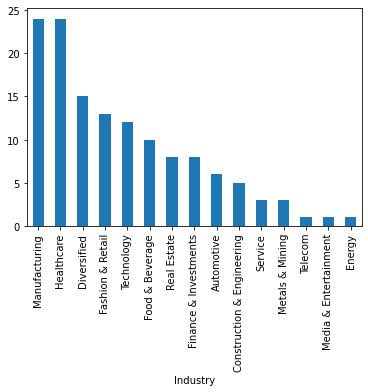

In [28]:
df_India.value_counts("Industry").plot(kind="bar")
#Count of Billionaires in the following Industries

<AxesSubplot:xlabel='Industry'>

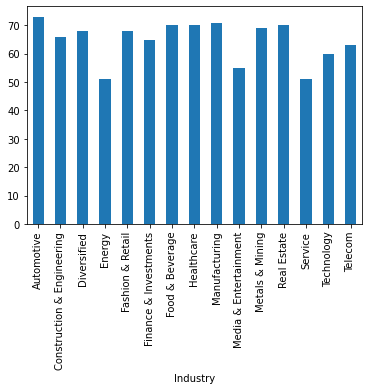

In [29]:
df_India.groupby("Industry").Age.mean().round().plot(kind="bar")
#Mean Age of Billionaires in the following Industries

# Analysis 2

<AxesSubplot:ylabel='Country'>

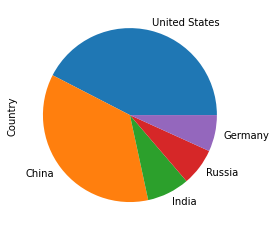

In [30]:
df.Country.value_counts().head().plot(kind="pie")
#Top 5 Countries in Number of Billionaires

<AxesSubplot:ylabel='Industry'>

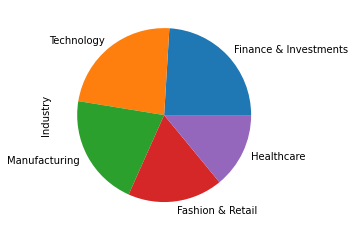

In [31]:
df.Industry.value_counts().head().plot(kind="pie")
#Top 5 Industries in Number of Billionaires

<AxesSubplot:ylabel='Source'>

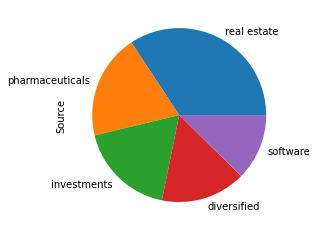

In [32]:
df.Source.value_counts().head().plot(kind="pie")
#Top 5 Industries in Number of Billionaires

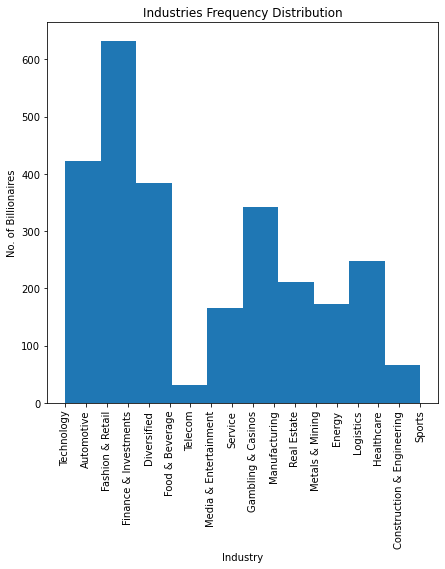

In [33]:
#Histogram of Industries Frequency Distribution
#Using matplotlib
plt.figure(figsize=(7,7))
plt.hist(df["Industry"], bins=10)
plt.xticks(rotation="vertical")
plt.title("Industries Frequency Distribution")
plt.ylabel("No. of Billionaires")
plt.xlabel("Industry")
plt.show()

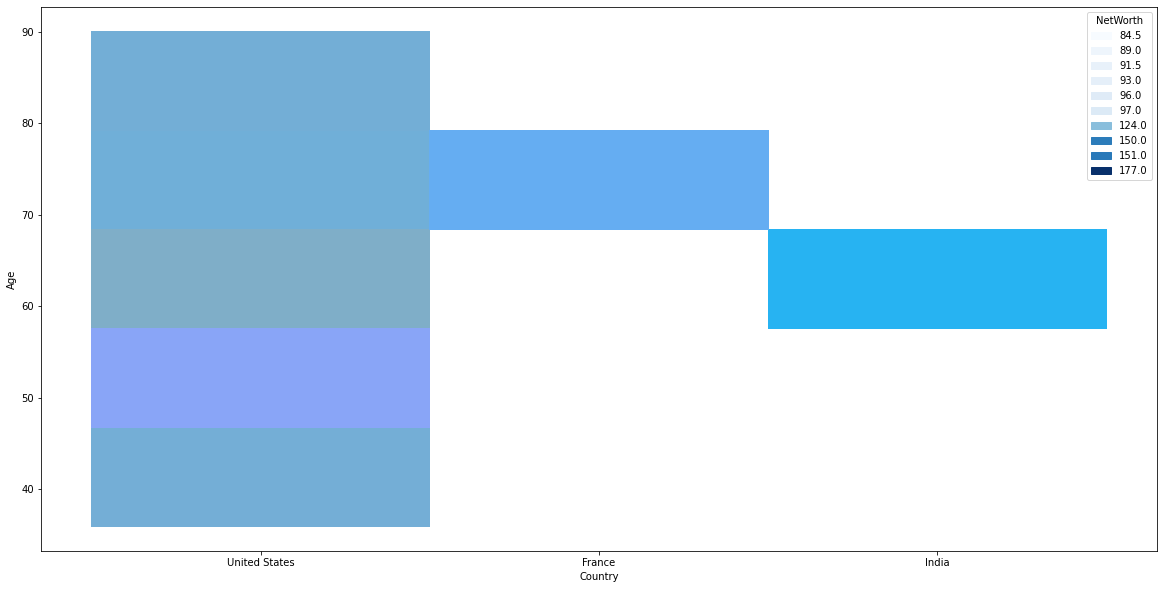

In [34]:
data1 = df.sort_values(by = ["NetWorth"], ascending=False).head(10)
plt.figure(figsize=(20, 10))
sns.histplot(x="Country",y="Age", hue="NetWorth", data=data1,palette="Blues")
plt.show()
#Histogram of Top 10 Countries having Billionaires according to Net Worth
#Using Seaborn

In [35]:
df_10=df.Country.value_counts().head(10)
df1=pd.DataFrame(df_10)
a= df1.reset_index()
#df1.reindex(columns=["Country","Count"])

In [36]:
a.columns=['Country','Count']
a
#Countries with maximum number of Billionaires

,Country,Count
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115
5,Hong Kong,68
6,Brazil,61
7,Canada,60
8,United Kingdom,54
9,Italy,49


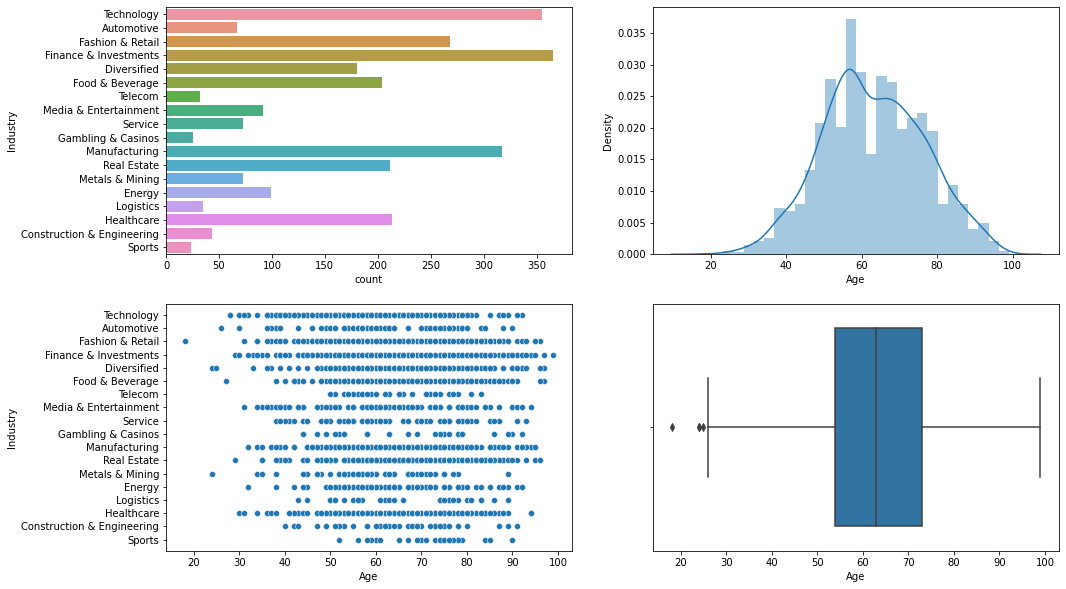

In [37]:
fig,axes=plt.subplots(2,2,figsize=(16,10))
sns.countplot(data=df,y="Industry",ax=axes[0,0])
sns.distplot(df["Age"],ax=axes[0,1])
sns.scatterplot(data=df, x="Age",y="Industry",ax=axes[1,0])
sns.boxplot(data=df,x="Age",ax=axes[1,1])
plt.show()


In [38]:
corr=df.corr()

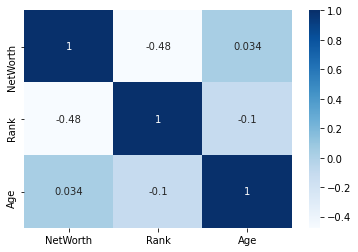

In [39]:
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()
#Heat map for correlations
#There is relation between Rank And Networth
#More the Networth Less is the Rank

At the end of the Analysis, I came to the conclusion that United States Of America and China are the countries with maximum
number of Billionaires which concludes that Growth and success rate of startups is more in US and China than other countries.
Industries like Finance & Investments and Technology has a lot of demand. Many people have flourished in these industries.
Highest paid Industry is Technology. Jeff Bezos is the richest Billionaire having Net Worth of 177 Billion Dollars.
India's Richest Billionaire is Mukesh Ambani having Net Worth 84.5 Billion Dollars.
Most Paid Industries in India is Manufacturing.
